In [12]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Agregar la carpeta 'src' al sys.path
import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_pickle("../../results/cluster_1.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,...,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650,1
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,2,2,20.625843,0.666667,0.0,17.079876,38.108656,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,2,3,9.703682,1.333333,0.0,16.396488,36.942910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,0,1,0,0,0,0,0,1,0,0,...,0,0,2,2,19.432030,0.666667,0.0,7.921195,0.197514,1
21510,0,1,0,0,0,0,0,0,0,1,...,0,1,2,1,21.415513,-0.333333,1.0,9.382697,0.114641,1
35970,1,0,0,1,0,0,0,0,0,0,...,1,0,2,1,7.972381,1.000000,0.0,22.406446,-0.224678,1
38169,1,0,0,0,0,0,0,1,0,0,...,0,1,2,1,7.832012,1.333333,0.0,8.464854,-0.251842,1


In [14]:
df2=pd.read_pickle("../../results/cluster_sinencod_1.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.9710,915.49,Medium,1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.4800,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.4850,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.5500,835.57,High,1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.0200,810.25,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...
19661,First Class,Corporate,EU,Furniture,4363.350,5,0.0,305.4000,12.14,High,1
21510,First Class,Corporate,US,Technology,4799.984,2,0.2,359.9988,10.34,Medium,1
35970,Same Day,Consumer,APAC,Office Supplies,1840.680,6,0.0,846.5400,2.97,Medium,1
38169,First Class,Consumer,EU,Technology,1809.780,7,0.0,325.7100,2.38,Medium,1


In [15]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [16]:
df["Sales_robust"]=df2["Sales"]

In [17]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [18]:
# Definición de los hiperparámetros a optimizar
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 15, 20, 25],  
    'min_samples_split': [2, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 5, 10],  
}

# Configuración de GridSearchCV para la optimización de hiperparámetros
model_RandomForestRegressor = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',  
    cv=10,  
    n_jobs=-1,  
)

# Entrenamiento del modelo con la búsqueda de hiperparámetros
model_RandomForestRegressor.fit(x_train, y_train)

best_rf_model = model_RandomForestRegressor.best_estimator_

In [19]:
y_test_pred_rf = best_rf_model.predict(x_test)
y_train_pred_rf = best_rf_model.predict(x_train)
sp.metricas(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

,r2_score,MAE,MSE,RMSE
Train,0.779500,306.745100,175122.044500,418.475900
Test,0.512100,438.281200,387607.714400,622.581500
Diferencia Train-Test,0.267400,-131.536100,-212485.669900,-204.105600
Porcentaje diferencia (%),10.351500,-8.827600,-18.879900,-9.802800
Rango valores,5296.590000,5296.590000,5296.590000,5296.590000
Ratio Rango (%),0.012193,7.033075,5312.189153,9.827619
Influencia dif rango (%),0.005000,2.483400,4011.744700,3.853500
Media,1612.093400,1612.093400,1612.093400,1612.093400
Ratio Media(%),0.040060,23.107417,17453.385731,32.288991
Influencia dif media (%),0.016600,8.159300,13180.729500,12.660900


El modelo muestra un buen ajuste en el conjunto de entrenamiento, pero sufre una caída significativa en el conjunto de prueba, lo que indica sobreajuste. Las métricas de error (MAE, MSE, RMSE) son mucho más altas en prueba, especialmente en valores extremos. Se recomienda implementar técnicas para reducir el overfitting,.

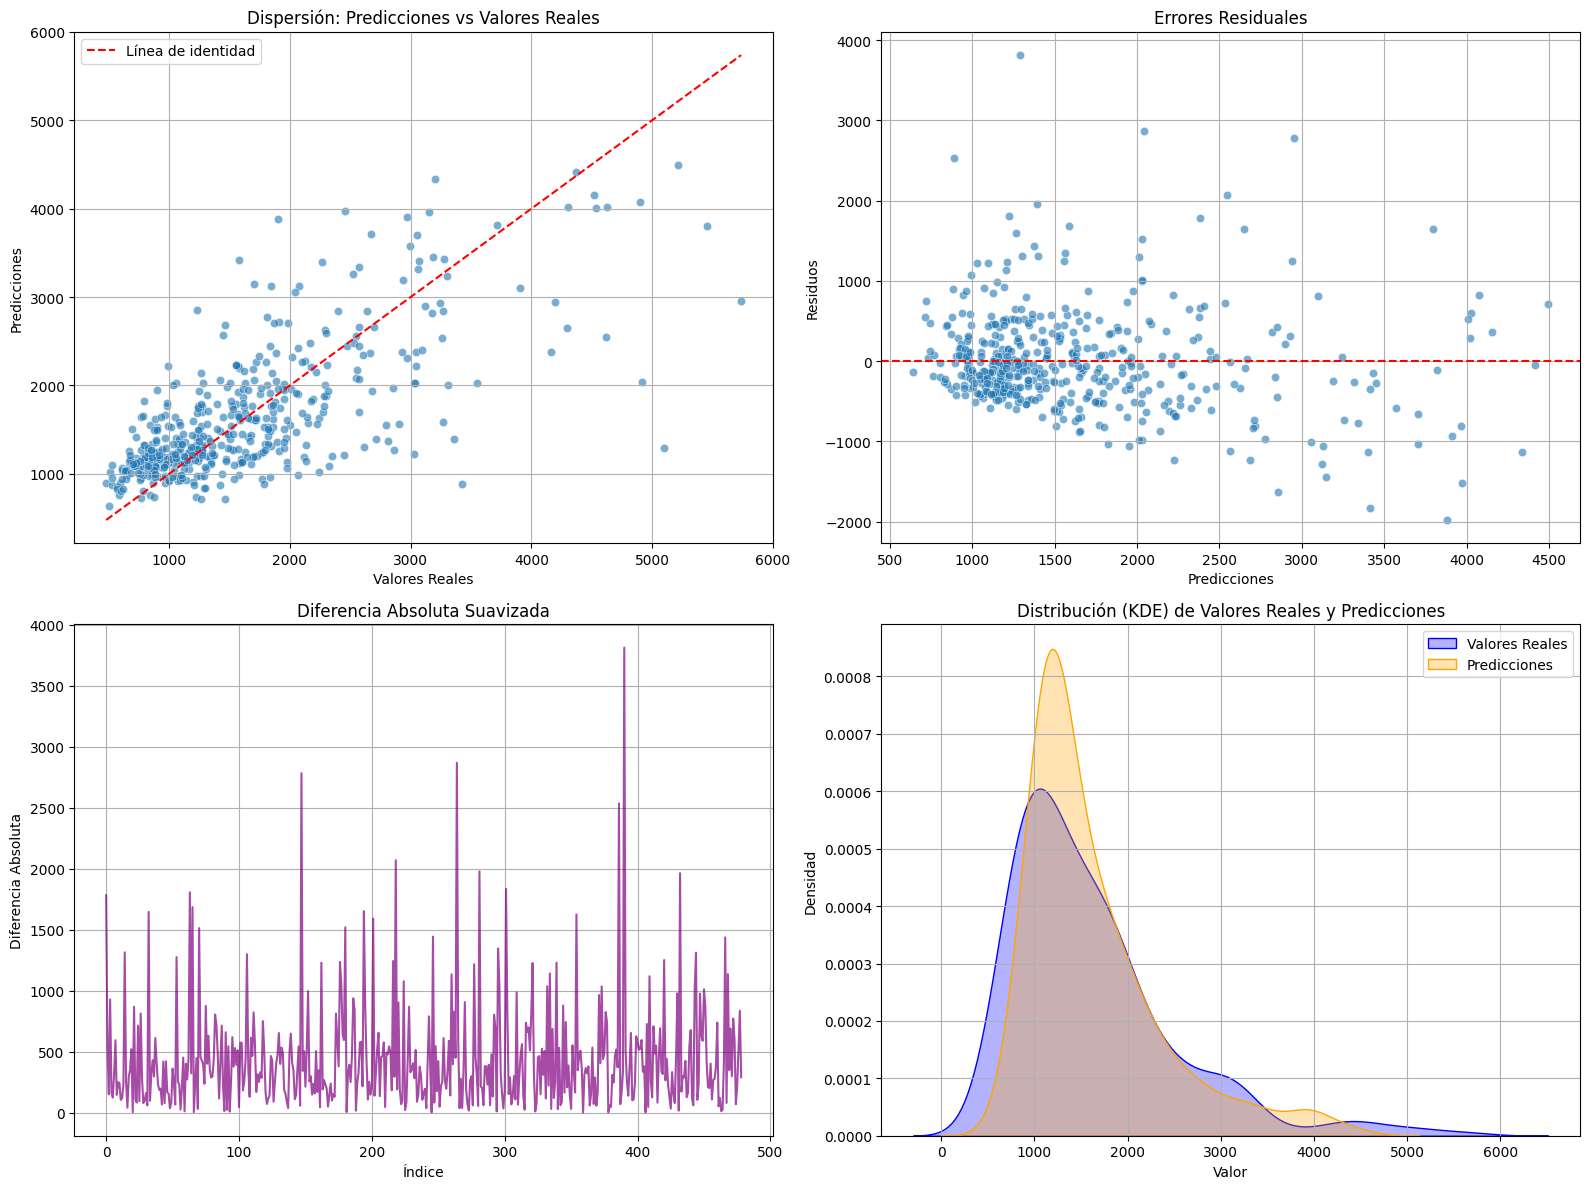

In [20]:
sp.comparativa_graficos(y_test, y_test_pred_rf)

Gráfico superior izquierdo: Dispersión (Predicciones vs Valores Reales)
- Las predicciones se ajustan razonablemente a los valores reales para rangos bajos y medios, pero se observa una tendencia a subestimar valores altos, como indica la concentración de puntos por debajo de la línea de identidad. La dispersión aumenta con los valores reales, mostrando que el modelo tiene dificultades para capturar patrones en extremos altos.

Gráfico superior derecho: Errores Residuales
- Los residuales están centrados cerca de cero, indicando un buen ajuste promedio. Sin embargo, la dispersión aumenta con valores de predicción más altos, lo que sugiere que el modelo no logra manejar de manera consistente las predicciones de valores extremos, generando tanto sobreestimaciones como subestimaciones.

Gráfico inferior izquierdo: Diferencia Absoluta Suavizada
- Las diferencias absolutas están relativamente controladas en la mayoría de los puntos, aunque hay picos significativos que corresponden a outliers o errores grandes en predicciones individuales. Esto indica que el modelo funciona bien en general, pero podría beneficiarse de estrategias para mitigar el impacto de estos valores atípicos.

Gráfico inferior derecho: Distribución (KDE) de Valores Reales y Predicciones
- Las distribuciones de los valores reales y predichos son similares, mostrando que el modelo captura la tendencia global de los datos. Sin embargo, las predicciones tienen una densidad ligeramente desplazada hacia valores más bajos, especialmente en el rango alto, confirmando la tendencia del modelo a subestimar valores altos.

In [21]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_RandomForestRegressor_cluster_1.pkl', 'wb') as file:
    pickle.dump(model_RandomForestRegressor, file)